In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Fish.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
#we are preparing a regression model which will take the inputs features and predict the weight of the fish.
#so that from that price can be estimated.

<AxesSubplot: xlabel='Species', ylabel='Weight'>

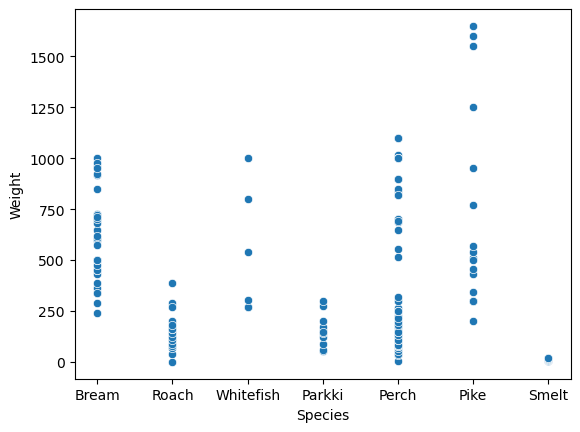

In [5]:
sns.scatterplot(x='Species',y='Weight',data=df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
pd.isnull(df).sum() 

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<AxesSubplot: xlabel='Species', ylabel='Count'>

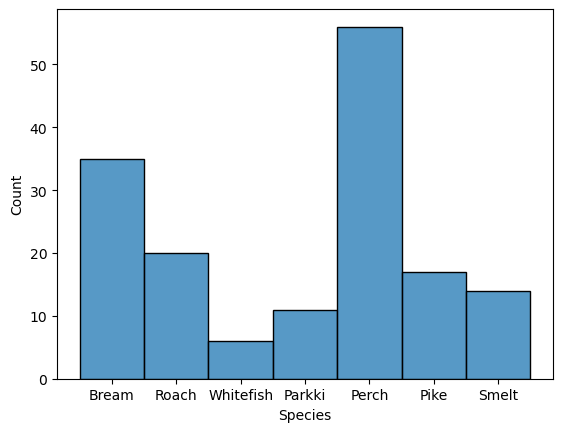

In [8]:
sns.histplot(data=df, x="Species")

<AxesSubplot: xlabel='Weight', ylabel='Count'>

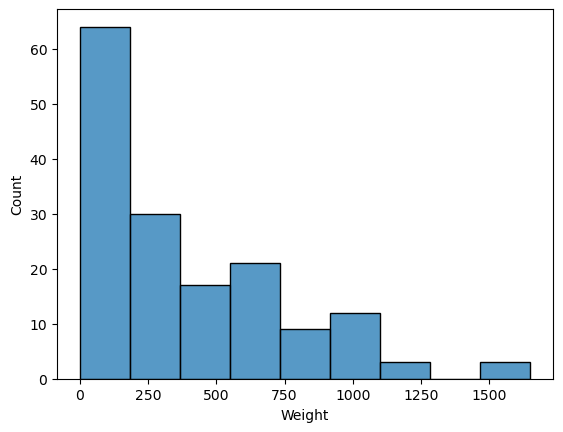

In [9]:
sns.histplot(data=df, x="Weight")

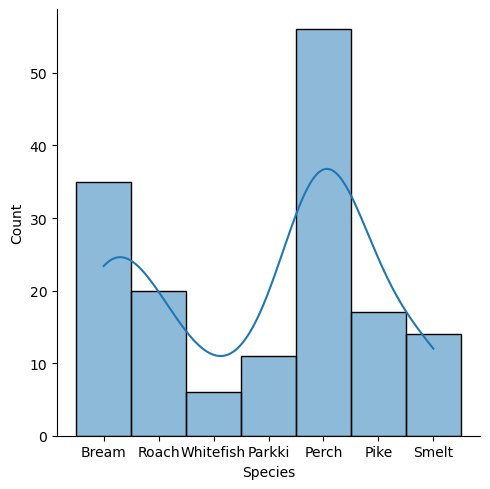

In [10]:
sns.displot(data=df, x="Species", kde=True) 

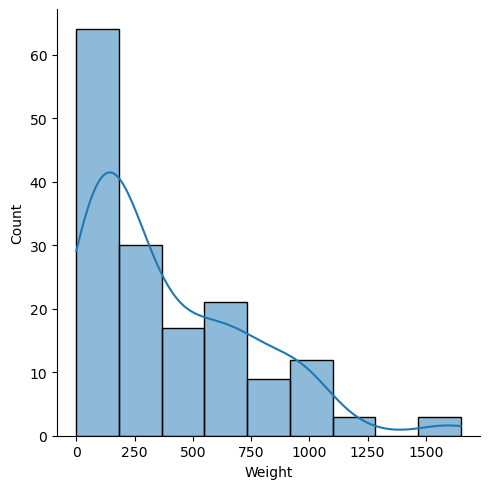

In [11]:
sns.displot(data=df, x="Weight", kde=True)

In [12]:
df.Species.describe()

count       159
unique        7
top       Perch
freq         56
Name: Species, dtype: object

In [13]:
df.Weight.mean()

398.3264150943396

In [14]:
df.Weight.describe()

count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64

In [15]:
df['z_score']=(df.Weight-df.Weight.mean())/(df.Weight.std())
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,z_score
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,-0.436692
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,-0.302606
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,-0.162933
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,-0.098683
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0.088479


In [16]:
df[(df.z_score<-3) | (df.z_score>3)]

,Species,Weight,Length1,Length2,Length3,Height,Width,z_score
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144,3.356833
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144,3.217160
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480,3.496507


In [17]:
fish_no_outliners=df[(df.z_score>-3) | (df.z_score<3)]
fish_no_outliners.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,z_score
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,-0.436692
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,-0.302606
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,-0.162933
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,-0.098683
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0.088479


In [18]:
from sklearn import preprocessing
le_species= preprocessing.LabelEncoder()


fish_no_outliners['species_new']=le_species.fit_transform(fish_no_outliners['Species'])
fish_no_outliners.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,z_score,species_new
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,-0.436692,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,-0.302606,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,-0.162933,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,-0.098683,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0.088479,0


In [19]:
fish_no_outliners.drop(['Species'],axis='columns',inplace=True)
fish_no_outliners.head()

,Weight,Length1,Length2,Length3,Height,Width,z_score,species_new
0,242.0,23.2,25.4,30.0,11.5200,4.0200,-0.436692,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,-0.302606,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,-0.162933,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,-0.098683,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0.088479,0


In [20]:
0 in fish_no_outliners.values

True

In [21]:
fish_no_outliners['Weight']=fish_no_outliners['Weight'].replace(0,fish_no_outliners['Weight'].mean())

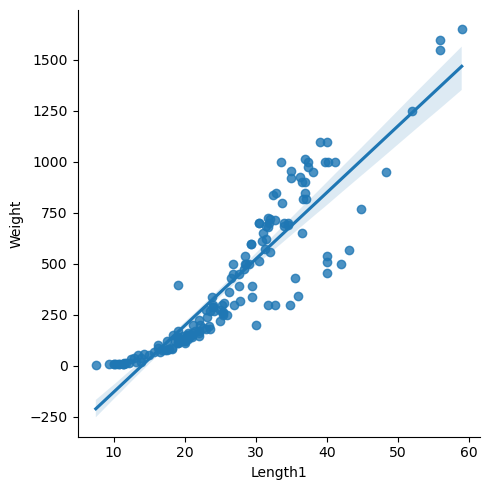

In [22]:
sns.lmplot(x='Length1',y='Weight',data=fish_no_outliners)

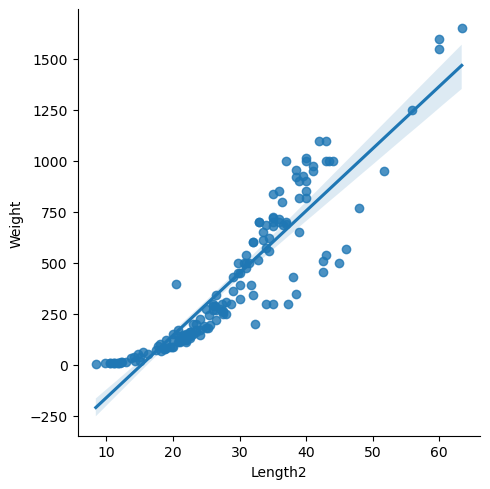

In [23]:
sns.lmplot(x='Length2',y='Weight',data=fish_no_outliners)

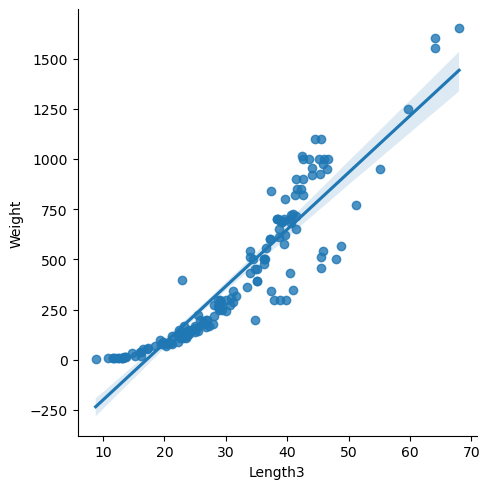

In [24]:
sns.lmplot(x='Length3',y='Weight',data=fish_no_outliners)

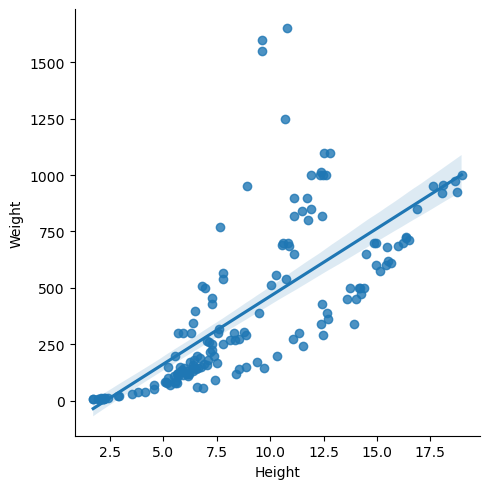

In [25]:
sns.lmplot(x='Height',y='Weight',data=fish_no_outliners)

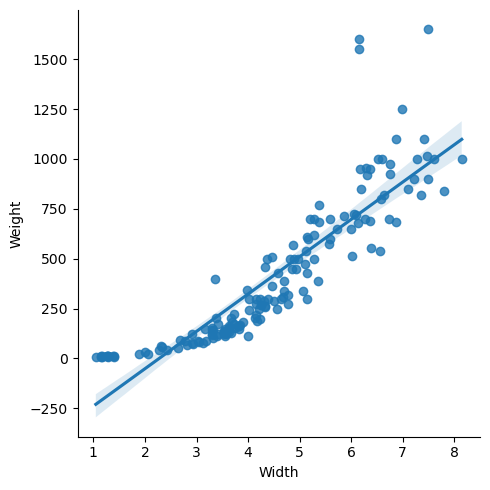

In [26]:
sns.lmplot(x='Width',y='Weight',data=fish_no_outliners)

In [27]:
fish_no_outliners.head()

,Weight,Length1,Length2,Length3,Height,Width,z_score,species_new
0,242.0,23.2,25.4,30.0,11.5200,4.0200,-0.436692,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,-0.302606,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,-0.162933,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,-0.098683,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0.088479,0


In [28]:
x=fish_no_outliners.drop(['z_score','Weight'],axis=1)
x.head()

,Length1,Length2,Length3,Height,Width,species_new
0,23.2,25.4,30.0,11.5200,4.0200,0
1,24.0,26.3,31.2,12.4800,4.3056,0
2,23.9,26.5,31.1,12.3778,4.6961,0
3,26.3,29.0,33.5,12.7300,4.4555,0
4,26.5,29.0,34.0,12.4440,5.1340,0


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x[['Length1']])
x['Length1']=scaler.transform(x[['Length1']])
scaler.fit(x[['Length2']])
x['Length2']=scaler.transform(x[['Length2']])
scaler.fit(x[['Length3']])
x['Length3']=scaler.transform(x[['Length3']])
scaler.fit(x[['Height']])
x['Height']=scaler.transform(x[['Height']])
scaler.fit(x[['Width']])
x['Width']=scaler.transform(x[['Width']])
scaler.fit(x[['species_new']])
x['species_new']=scaler.transform(x[['species_new']])

In [30]:
x.head()

,Length1,Length2,Length3,Height,Width,species_new
0,0.304854,0.309091,0.358108,0.568334,0.418978,0.0
1,0.320388,0.325455,0.378378,0.624055,0.459235,0.0
2,0.318447,0.329091,0.376689,0.618123,0.514279,0.0
3,0.365049,0.374545,0.417230,0.638566,0.480365,0.0
4,0.368932,0.374545,0.425676,0.621966,0.576004,0.0


In [31]:
x.head()

,Length1,Length2,Length3,Height,Width,species_new
0,0.304854,0.309091,0.358108,0.568334,0.418978,0.0
1,0.320388,0.325455,0.378378,0.624055,0.459235,0.0
2,0.318447,0.329091,0.376689,0.618123,0.514279,0.0
3,0.365049,0.374545,0.417230,0.638566,0.480365,0.0
4,0.368932,0.374545,0.425676,0.621966,0.576004,0.0


In [32]:
y=fish_no_outliners.Weight
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [34]:
len(x_train)

127

In [35]:
len(x_test)

32

In [36]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train.values,y_train)

LinearRegression()

In [37]:
reg.score(x_test.values,y_test)

0.9005400320297948

In [38]:
from sklearn.ensemble import RandomForestRegressor
reg1= RandomForestRegressor(n_estimators=5)
reg1.fit(x_train.values,y_train)

RandomForestRegressor(n_estimators=5)

In [39]:
reg1.score(x_test.values,y_test)                    

0.9492913926654597

In [40]:
reg.predict([[0.4,0.38,0.43,0.67,0.5,0]])

array([492.34551467])

In [41]:
reg1.predict([[0.4,0.38,0.43,0.67,0.5,0]])

array([458.])